# Least Angle Regression

最小角回归(LARS)是一种适用于高维数据的回归算法。LARS类似于forward stepwise regression前向逐步回归。在每一步，它都会发现与响应最相关的预测器。当有多个预测器具有相等的相关性时，他不再沿着相同的预测器进行，而是沿着预测器之间的等角方向进行。
LARS的优势在于：
1、在文本计算中效率极高，尤其是p>>n，也就是维度远大于点数的时候。
2、计算速度和forward selection一样快，但是和最小二乘法的复杂度度一样小。
3、它产生一个完整的分段线性解决方案路径，这对于交叉验证或者类似的调节模型的尝试是非常有帮助的。
4、如果两个变量与响应的关联性几乎相同，那么他们的系数应该以几乎相同的倍率增加。该算法表现出了直觉所期待的效果，而且更稳定。
5、它很容易被修改来生成其他预测器的解决方案，比如Lasso。

LARS的劣势在于：
1、因为LARLS是基于对残差的迭代重拟合，所以它对噪声的影响特别敏感。
LARS模型使用Lars预测器或者较低层次的lars_path实现。

## LARS Lasso

LassoLars是一个使用LARS算法的Lasso模型，不同于其基于坐标下降的实现，这种算法得出了精确的解，这个解是分段线性的，是其系数的范数的函数。。。。。

In [1]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1)
reg.fit([[0, 0], [1, 1]], [0, 1])
reg.coef_

array([ 0.71715729,  0.        ])

## Example：Lasso path using LARS

这个例子是基于糖尿病数据集的，使用LARS算法沿着正则化的参数计算Lasso Path。每个颜色代表系数向量的一个不同特征，并且这被展示为一个正则化参数的方程。

Computing regularization path using the LARS ...
.

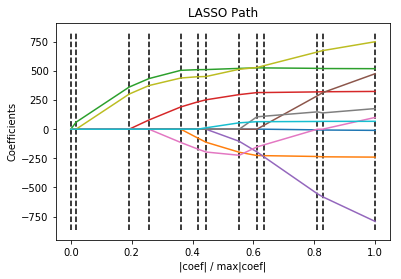

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

print("Computing regularization path using the LARS ...")
alphas, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

Lars算法几乎免费提供了正则化参数上系数的完整路径，因此一种常见的操作是使用Lars_path检索路径。

### Mathematical formulation

这个算法与forward stepwise回归类似的，但是不同于在每一步包含变量，而是按与残差相关成等角的方向增加预测参数。
不同于给出一个向量结果，LARS方案由表示参数向量L1范数的每个值得一条曲线组成。全系数路径存储在数组coef_path_中，该数组的大小为(n_features,max_features+1)。第一列总是0.